<a href="https://www.kaggle.com/code/lalit7881/tmdb-ml-analysis-1950-2025-acc-90?scriptVersionId=296861981" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-movies-database-tmdb-1950-2025/tmdb_movies.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/the-movies-database-tmdb-1950-2025/tmdb_movies.csv")

In [3]:
df.head()

,id,title,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country
0,1,Movie Title 1,"Science Fiction, Comedy, Horror",1957-01-01,1957,36972721,1.306928e+08,123,4.496790,9221,Germany
1,2,Movie Title 2,"Documentary, Romance",1999-01-01,1999,96359319,2.947975e+08,146,5.803306,4592,China
2,3,Movie Title 3,"Science Fiction, Action",1941-01-01,1941,135172742,1.048409e+08,168,2.710639,7146,Japan
3,4,Movie Title 4,"Comedy, Drama, Adventure",1961-01-01,1961,129049379,1.535585e+08,134,5.631398,8363,Germany
4,5,Movie Title 5,"Comedy, Romance",1969-01-01,1969,151390401,1.008291e+08,116,4.245862,9487,Japan


In [4]:
df.tail()

,id,title,genre,release_date,release_year,budget,revenue,runtime,vote_average,vote_count,production_country
95,96,Movie Title 96,"Adventure, Romance, Action",1963-01-01,1963,154295031,4.187739e+08,152,5.176100,5874,United States of America
96,97,Movie Title 97,Romance,1954-01-01,1954,229800243,4.685299e+08,143,1.545710,8398,France
97,98,Movie Title 98,"Romance, Documentary, Horror",1994-01-01,1994,239347042,1.105000e+09,83,1.724018,7113,United States of America
98,99,Movie Title 99,"Comedy, Drama",2022-01-01,2022,172874604,8.066428e+08,168,1.491389,9916,Japan
99,100,Movie Title 100,"Science Fiction, Drama",2000-01-01,2000,3892348,4.004654e+06,125,7.687781,9622,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  100 non-null    int64  
 1   title               100 non-null    object 
 2   genre               100 non-null    object 
 3   release_date        100 non-null    object 
 4   release_year        100 non-null    int64  
 5   budget              100 non-null    int64  
 6   revenue             100 non-null    float64
 7   runtime             100 non-null    int64  
 8   vote_average        100 non-null    float64
 9   vote_count          100 non-null    int64  
 10  production_country  100 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.7+ KB


In [6]:
df.describe()

,id,release_year,budget,revenue,runtime,vote_average,vote_count
count,100.000000,100.00000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,50.500000,1980.89000,1.199285e+08,3.325427e+08,128.560000,5.403200,5498.100000
std,29.011492,24.03066,7.501923e+07,2.760798e+08,29.265183,2.716531,2844.219378
min,1.000000,1940.00000,1.581646e+06,4.004654e+06,80.000000,1.076640,21.000000
25%,25.750000,1961.00000,4.954816e+07,9.697859e+07,102.500000,2.898215,3057.500000
50%,50.500000,1981.00000,1.174061e+08,2.541225e+08,132.000000,5.157603,5714.500000
75%,75.250000,1999.25000,1.881243e+08,5.287118e+08,151.000000,7.944961,8172.750000
max,100.000000,2024.00000,2.452930e+08,1.105000e+09,177.000000,9.956007,9990.000000


In [7]:
df.dtypes

id                      int64
title                  object
genre                  object
release_date           object
release_year            int64
budget                  int64
revenue               float64
runtime                 int64
vote_average          float64
vote_count              int64
production_country     object
dtype: object

In [8]:
df.shape

(100, 11)

In [9]:
df.isnull().sum()

id                    0
title                 0
genre                 0
release_date          0
release_year          0
budget                0
revenue               0
runtime               0
vote_average          0
vote_count            0
production_country    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

id                    100
title                 100
genre                  69
release_date           59
release_year           59
budget                100
revenue               100
runtime                59
vote_average          100
vote_count             99
production_country      8
dtype: int64

In [12]:
df.columns

Index(['id', 'title', 'genre', 'release_date', 'release_year', 'budget',
       'revenue', 'runtime', 'vote_average', 'vote_count',
       'production_country'],
      dtype='object')

## Data visualizations

In [13]:
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing important identifiers
df.dropna(subset=['id', 'title'], inplace=True)


In [14]:
df.drop_duplicates(subset=['id', 'title'], inplace=True)


In [15]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_year'].astype(int)


In [16]:
df['profit'] = df['revenue'] - df['budget']
df['profit_margin'] = df['profit'] / df['budget']

df['runtime_category'] = pd.cut(
    df['runtime'],
    bins=[0, 90, 120, 300],
    labels=['Short', 'Medium', 'Long']
)


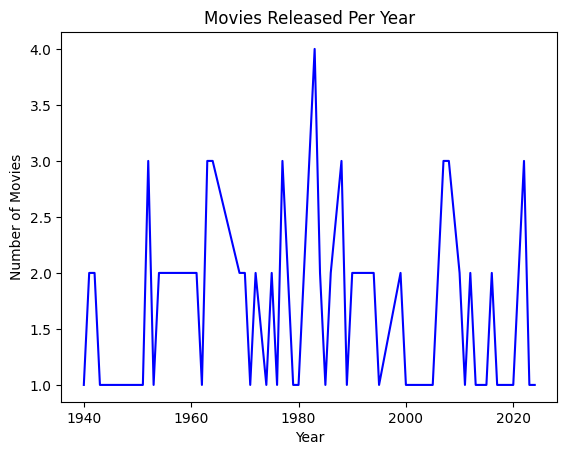

In [17]:
movies_per_year = df['release_year'].value_counts().sort_index()

plt.plot(movies_per_year.index, movies_per_year.values, color='blue')
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


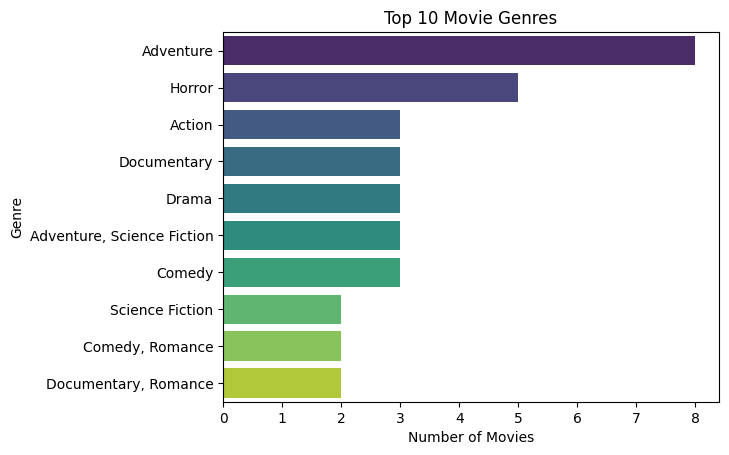

In [18]:
top_genres = df['genre'].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


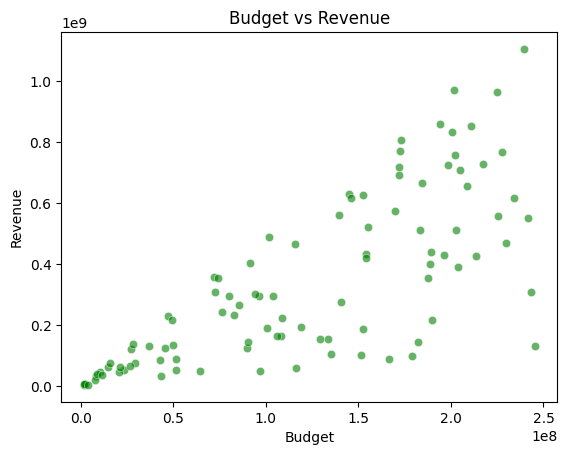

In [19]:
sns.scatterplot(
    x='budget',
    y='revenue',
    data=df,
    color='green',
    alpha=0.6
)

plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


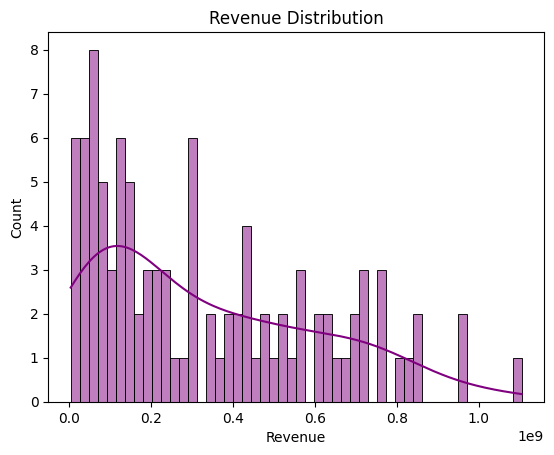

In [20]:
sns.histplot(df['revenue'], bins=50, kde=True, color='purple')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.show()


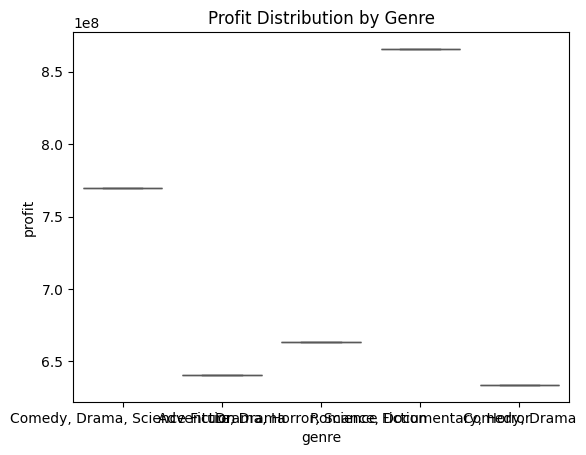

In [21]:
top_profit_genres = df.groupby('genre')['profit'].mean().sort_values(ascending=False).head(5)

sns.boxplot(
    x='genre',
    y='profit',
    data=df[df['genre'].isin(top_profit_genres.index)],
    palette='Set2'
)

plt.title('Profit Distribution by Genre')
plt.show()


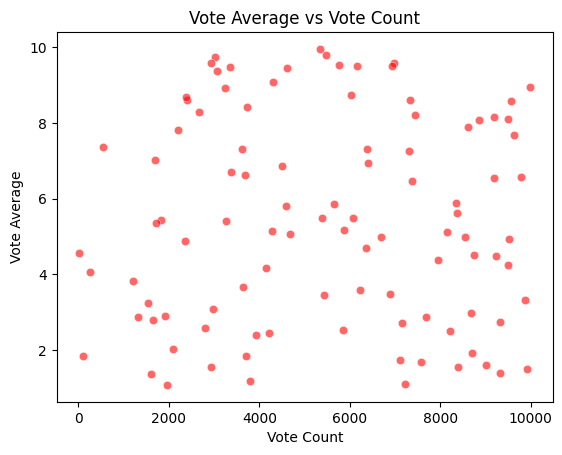

In [22]:
sns.scatterplot(
    x='vote_count',
    y='vote_average',
    data=df,
    color='red',
    alpha=0.6
)

plt.title('Vote Average vs Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.show()


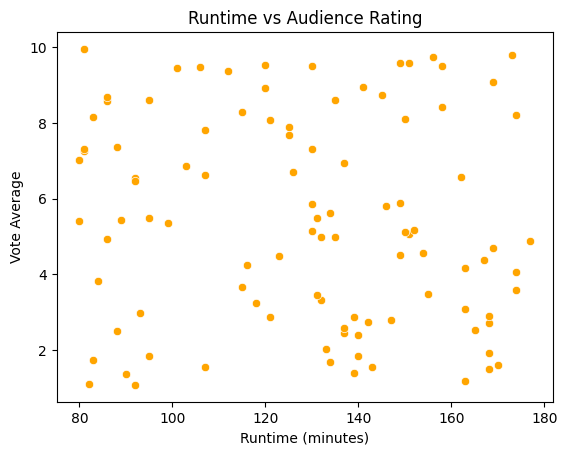

In [23]:
sns.scatterplot(
    x='runtime',
    y='vote_average',
    data=df,
    color='orange'
)

plt.title('Runtime vs Audience Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Vote Average')
plt.show()


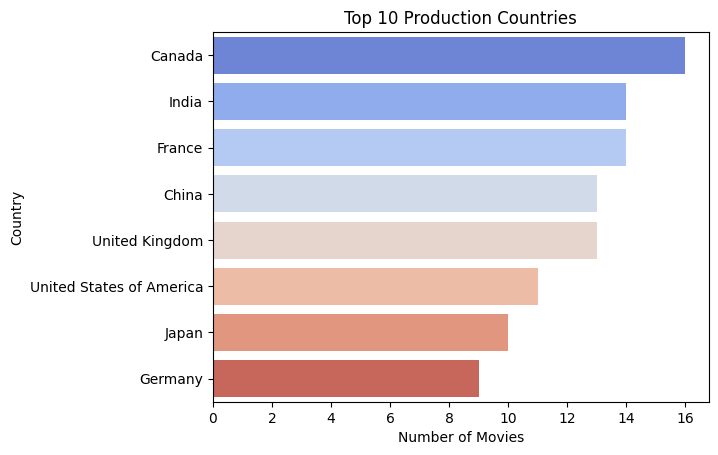

In [24]:
top_countries = df['production_country'].value_counts().head(10)

sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette='coolwarm'
)

plt.title('Top 10 Production Countries')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.show()


## Feature engg

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  100 non-null    int64         
 1   title               100 non-null    object        
 2   genre               100 non-null    object        
 3   release_date        100 non-null    datetime64[ns]
 4   release_year        100 non-null    int64         
 5   budget              100 non-null    int64         
 6   revenue             100 non-null    float64       
 7   runtime             100 non-null    int64         
 8   vote_average        100 non-null    float64       
 9   vote_count          100 non-null    int64         
 10  production_country  100 non-null    object        
 11  profit              100 non-null    float64       
 12  profit_margin       100 non-null    float64       
 13  runtime_category    100 non-null    category      


id                    0
title                 0
genre                 0
release_date          0
release_year          0
budget                0
revenue               0
runtime               0
vote_average          0
vote_count            0
production_country    0
profit                0
profit_margin         0
runtime_category      0
dtype: int64

In [27]:
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)

df.dropna(subset=['title'], inplace=True)
df.drop_duplicates(inplace=True)


In [28]:
df['profit'] = df['revenue'] - df['budget']

# Target: Hit (1) if profit > 0 else Flop (0)
df['hit'] = (df['profit'] > 0).astype(int)


In [29]:
le_genre = LabelEncoder()
le_country = LabelEncoder()

df['genre_encoded'] = le_genre.fit_transform(df['genre'])
df['country_encoded'] = le_country.fit_transform(df['production_country'])


In [30]:
X = df[
    [
        'budget',
        'runtime',
        'vote_average',
        'vote_count',
        'genre_encoded',
        'country_encoded'
    ]
]

y = df['hit']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

results = []



Logistic Regression
Accuracy: 90.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



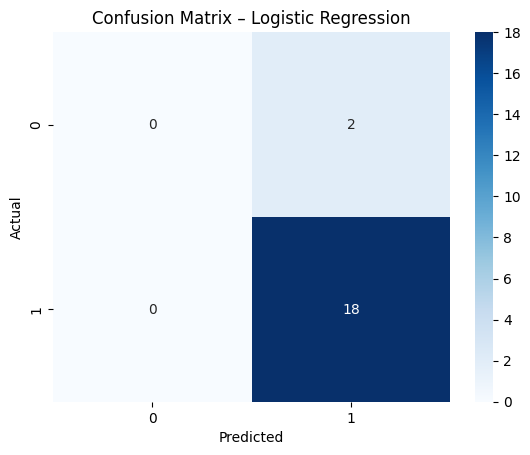


Decision Tree
Accuracy: 75.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.88      0.83      0.86        18

    accuracy                           0.75        20
   macro avg       0.44      0.42      0.43        20
weighted avg       0.79      0.75      0.77        20



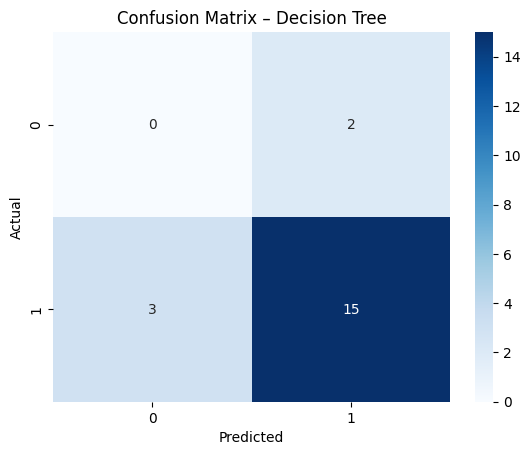


Random Forest
Accuracy: 90.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



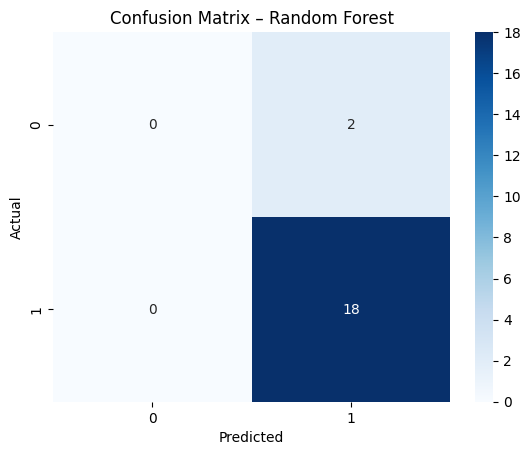


KNN
Accuracy: 90.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



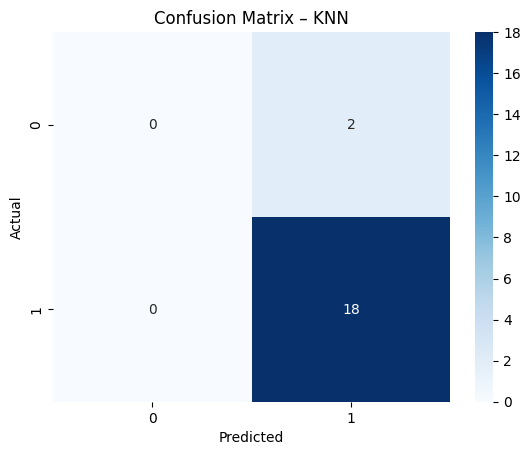


SVM
Accuracy: 90.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



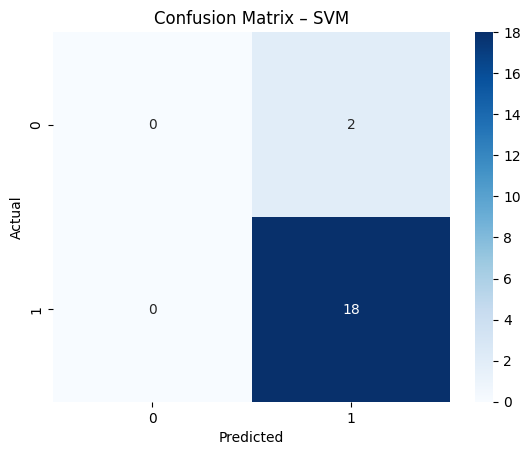

In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) * 100
    results.append([name, acc])

    print(f"\n{name}")
    print(f"Accuracy: {acc:.2f}%")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix – {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [35]:
accuracy_df = pd.DataFrame(results, columns=['Model', 'Accuracy (%)'])
accuracy_df.sort_values(by='Accuracy (%)', ascending=False)


,Model,Accuracy (%)
0,Logistic Regression,90.0
2,Random Forest,90.0
3,KNN,90.0
4,SVM,90.0
1,Decision Tree,75.0


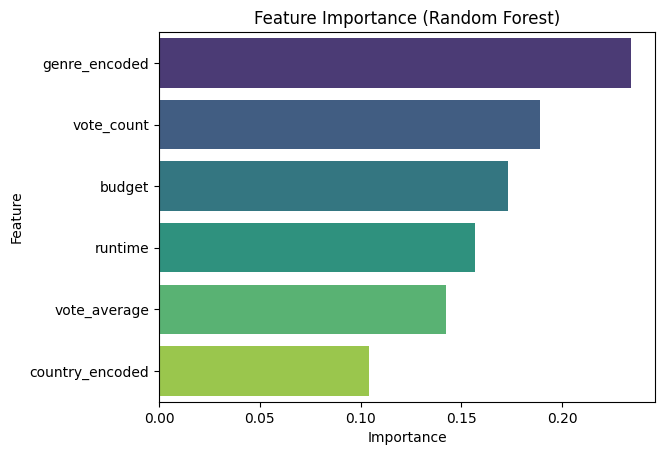

In [36]:
rf_model = models['Random Forest']
feature_importance = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='viridis'
)

plt.title('Feature Importance (Random Forest)')
plt.show()


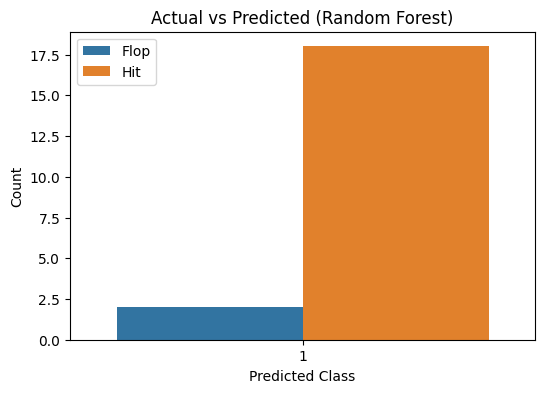

In [37]:
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred_rf, hue=y_test)
plt.title('Actual vs Predicted (Random Forest)')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.legend(['Flop', 'Hit'])
plt.show()


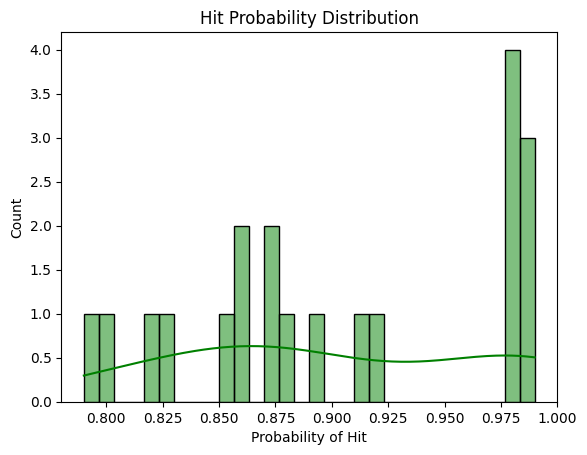

In [38]:
rf_prob = rf_model.predict_proba(X_test)[:, 1]

sns.histplot(rf_prob, bins=30, kde=True, color='green')
plt.title('Hit Probability Distribution')
plt.xlabel('Probability of Hit')
plt.show()


## Thank you..pls uovote!!!!!!